In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('salary_data_cleaned.csv')

In [35]:
df.head()
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [36]:
def title_simplier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engeineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'

In [37]:
df['jomb_simp'] = df['Job Title'].apply(title_simplier)
df.jomb_simp.value_counts()

data scientist    279
na                184
data engeineer    119
analyst           102
mle                22
manager            22
director           14
Name: jomb_simp, dtype: int64

In [38]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

Fix State of LA


In [39]:
df.job_state.value_counts()
df['job_state'] = df.job_state.apply(lambda x:x.strip() if  x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
AZ      9
MO      9
AL      8
DE      6
MI      6
KY      6
GA      6
IA      5
CT      5
NE      4
LA      4
OR      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [40]:
#Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
5      3747
6      1786
7      3804
8      1538
9      4574
10     2757
11     3490
12     3934
13     4897
14     3731
15     1889
16     3639
17     4163
18     3512
19     4397
20     2918
21     6909
22     6408
23     2907
24     3760
25     3698
26     4420
27     4900
28     5015
29     3461
       ... 
712    3725
713    3776
714    2306
715    7121
716    3911
717    2867
718    2311
719    6175
720    3783
721    2479
722    5338
723    3243
724    1848
725    7361
726    3374
727    3693
728    4613
729    4707
730    3309
731    2752
732    3478
733    5717
734    5016
735    3813
736    5025
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [41]:
df.Competitors

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [42]:
# Competitor count 
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [43]:
df.num_comp

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
      ..
712    3
713    0
714    0
715    0
716    3
717    0
718    0
719    3
720    0
721    3
722    0
723    3
724    0
725    0
726    0
727    0
728    0
729    0
730    0
731    0
732    0
733    0
734    0
735    2
736    3
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [44]:
## hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [45]:
df[df.hourly==1][['hourly','min_salary','max_salary']] 

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


### Remove the new line of the company caracter

In [46]:
df.company_txt # AS YOU SEE THE \n

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
5                                   CyrusOne\n
6                         ClearOne Advantage\n
7                                 Logic20/20\n
8                  Rochester Regional Health\n
9                                   <intent>\n
10                                      Wish\n
11                                   ManTech\n
12                                   Walmart\n
13                                    Yesler\n
14                    Takeda Pharmaceuticals\n
15                                   Audible\n
16                       Blueprint Medicines\n
17                                    h2o.ai\n
18                                      Nuna\n
19                        Pinnacol Assurance\n
20                                     Porch\n
21           

In [47]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

# BEGENNING ANALYSIS

In [48]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


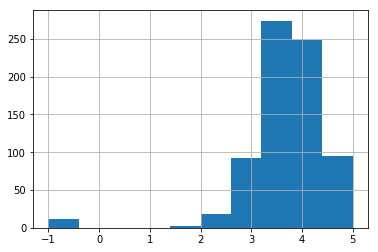

In [49]:
df.Rating.hist() # Pretty normal distribution

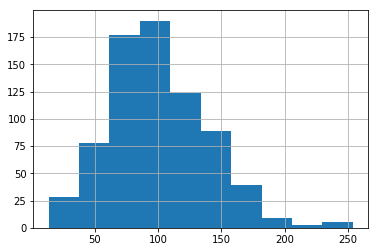

In [51]:
df.avg_salary.hist()


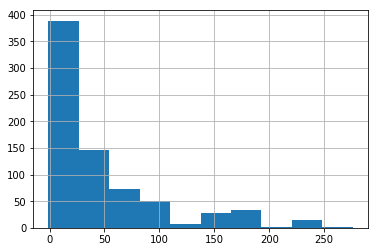

In [52]:
df.age.hist()

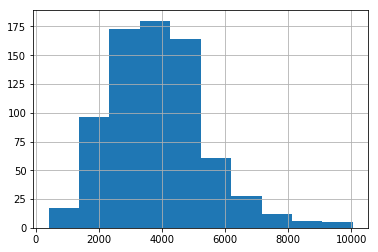

In [53]:
df.desc_len.hist() # Prettu close normal distribution

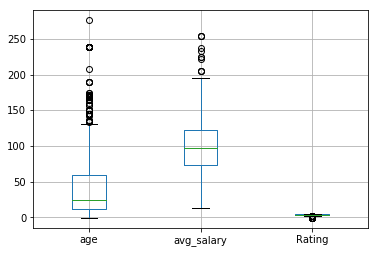

In [59]:
df.boxplot(column=['age','avg_salary','Rating']) # We need normalize or do a boxplot for each feature

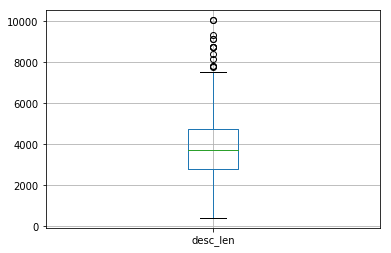

In [60]:
df.boxplot('desc_len')

## Correlation

In [66]:
corr=df[['age','avg_salary','Rating','desc_len','num_comp']].corr()

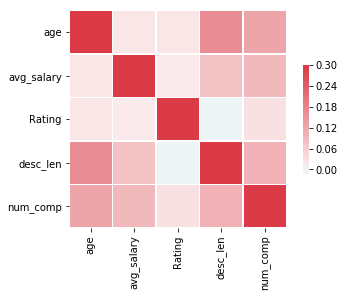

In [67]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'jomb_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

## Categorical variable

In [70]:
df_cat= df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state','same_state',
   'python_yn', 'R_yn','spark', 'aws', 'excel', 'jomb_simp', 'seniority']]

graph for Location : total = 200


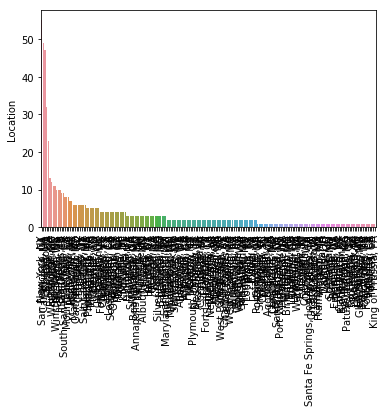

graph for Headquarters : total = 198


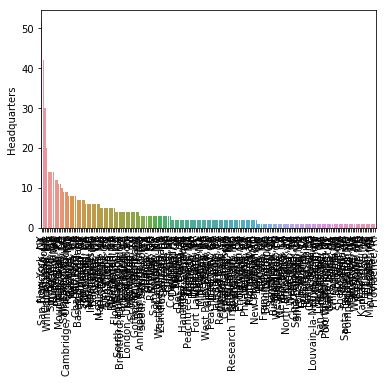

graph for Size : total = 9


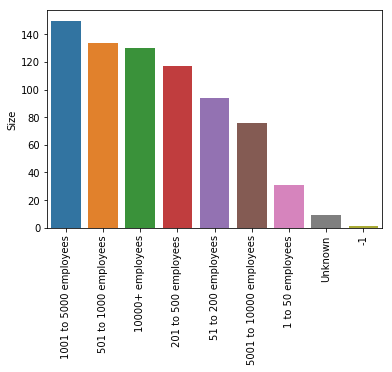

graph for Type of ownership : total = 11


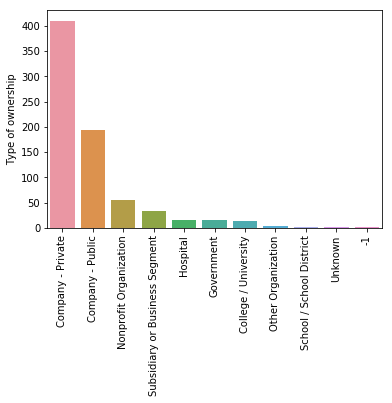

graph for Industry : total = 60


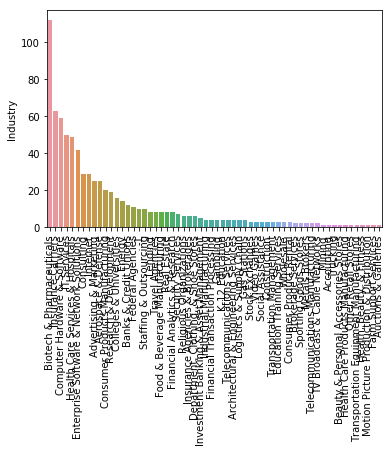

graph for Sector : total = 25


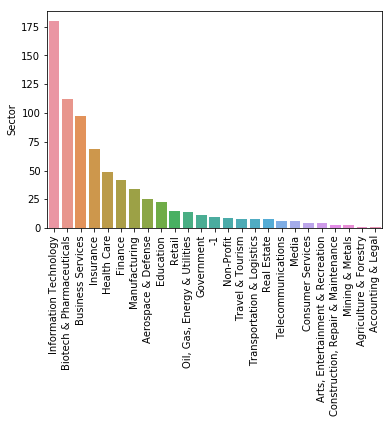

graph for Revenue : total = 14


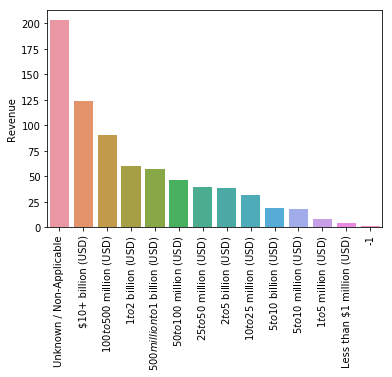

graph for company_txt : total = 343


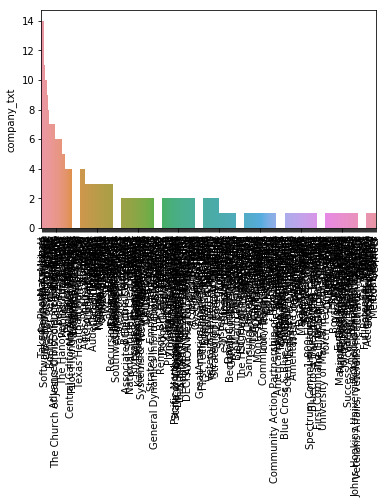

graph for job_state : total = 37


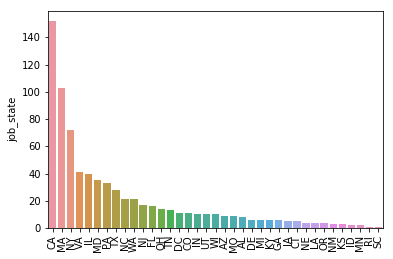

graph for same_state : total = 2


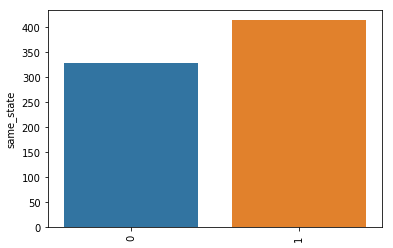

graph for python_yn : total = 2


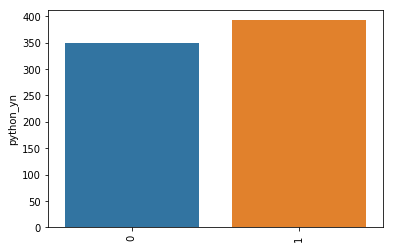

graph for R_yn : total = 2


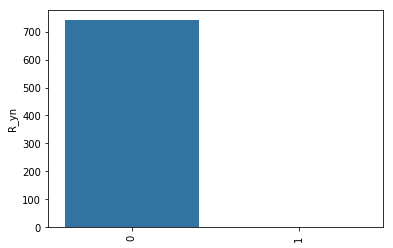

graph for spark : total = 2


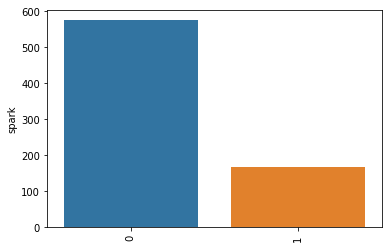

graph for aws : total = 2


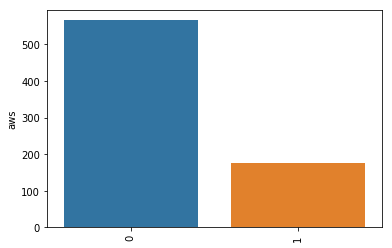

graph for excel : total = 2


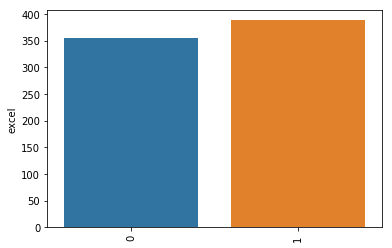

graph for jomb_simp : total = 7


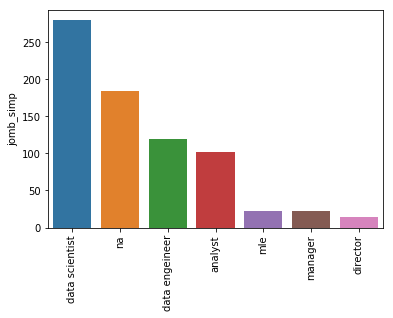

graph for seniority : total = 3


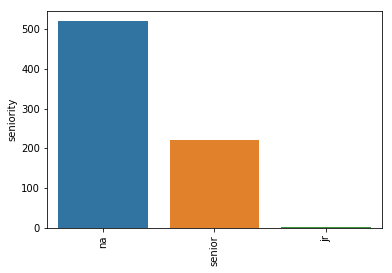

In [75]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"graph for {i} : total = {len(cat_num)}")
    chart= sns.barplot(x=cat_num.index, y=cat_num, data=df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

graph for Location : total = 20


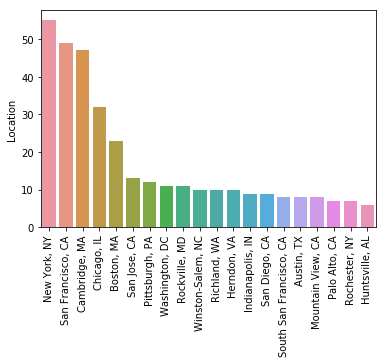

graph for Headquarters : total = 20


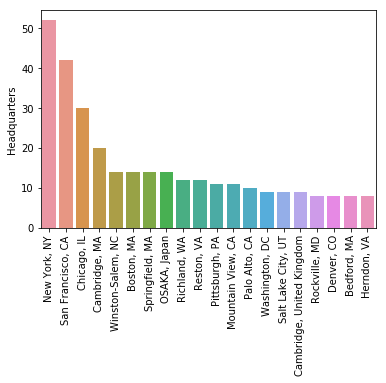

graph for company_txt : total = 20


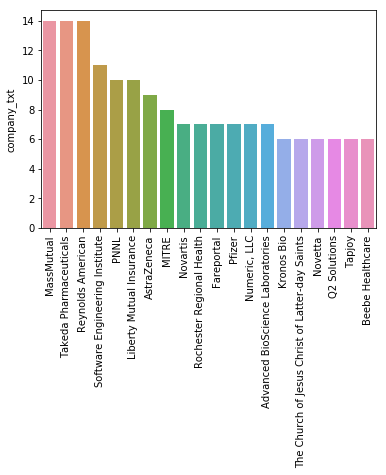

In [80]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print(f"graph for {i} : total = {len(cat_num)}")
    chart= sns.barplot(x=cat_num.index, y=cat_num, data=df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

In [81]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'jomb_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [83]:
pd.pivot_table(df, index='jomb_simp', values='avg_salary')

,avg_salary
jomb_simp,
analyst,65.857843
data engeineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [84]:
pd.pivot_table(df, index=['jomb_simp','seniority'], values='avg_salary')

avg_salary
jomb_simp      seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engeineer na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [87]:
pd.pivot_table(df, index=['job_state','jomb_simp'], values='avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state jomb_simp                 
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engeineer   96.900000
          analyst          71.583333
UT        data engeineer  100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engeineer  113.062500
TN        data scientist   96.000000
          data engeineer  100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        manager         109.666667
          data engeineer   91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
OR        data scientist   98.500000
          data engeineer   73.000000
...                              ...
IA        data engeineer  102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engeineer   91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engeineer   85.000000
          analyst          63.500000
CT        na               62.500000
          data scientist   84.000000
CO        mle             100.500000
          data engeineer   99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
CA        na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engeineer  129.540000
          analyst          85.250000
AZ        data scientist   69.500000
          data engeineer   79.500000
          analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engeineer   65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [89]:
pd.pivot_table(df[df.jomb_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [98]:
df_pivots = df[['Rating','Industry','Sector','Revenue','num_comp','hourly','employer_provided','python_yn','R_yn','spark','aws','excel','Type of ownership','avg_salary']]

In [101]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [103]:
pd.pivot_table(df_pivots, index = 'Revenue', columns='python_yn', values='avg_salary' , aggfunc='count') # So we need to use python

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


# TEXT ANALYZE

In [105]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

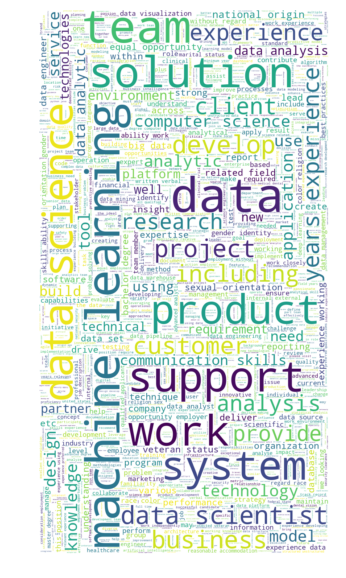

In [115]:
words =" ".join(df['Job Description'])

def punctuation_stop(text):
    """ remove ponctuatuion and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()